# Import Necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [3]:
data = pd.read_csv(r"H:\Data Analyst\Project\ALL files\ipynb\Excel_Data_for_Python\My Uber Drives - 2016.csv")

In [5]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Check for Missing Values

In [6]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [7]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [13]:
data = data.dropna()

# Convert datatypes

In [14]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [15]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format ='%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format ='%m/%d/%Y %H:%M')

In [16]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

#### Add hour, day, month, week Column in data

In [17]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR'] = hour
data['DAY'] = day
data['DAY_OF_WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

In [18]:
pd.set_option('display.max.rows',655)

In [19]:
#Reset index as we have deleted some rows
data.reset_index(drop=True, inplace = True)

In [20]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
1,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
2,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
3,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
4,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


# Category we have

In [21]:
data['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

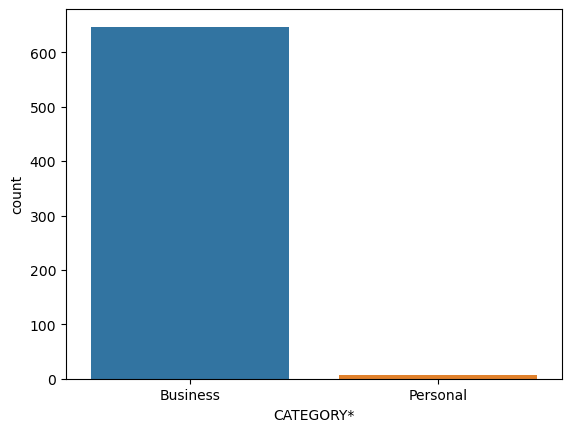

In [16]:
sns.countplot(x = 'CATEGORY*', data = data)

# How long do people travel with Uber

<Axes: ylabel='Frequency'>

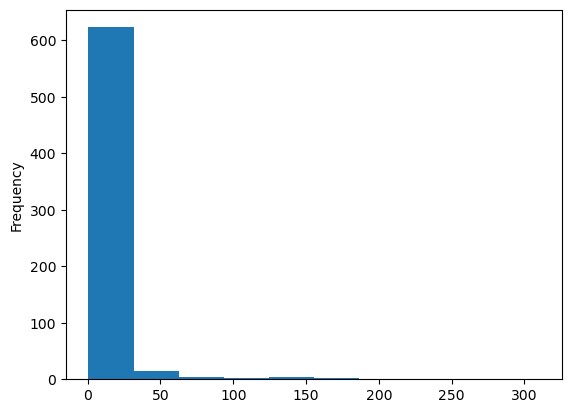

In [22]:
data['MILES*'].plot.hist()

# What Hour do most users take Uber to their destination?

Text(0.5, 1.0, 'Number of Trips vs Hours')

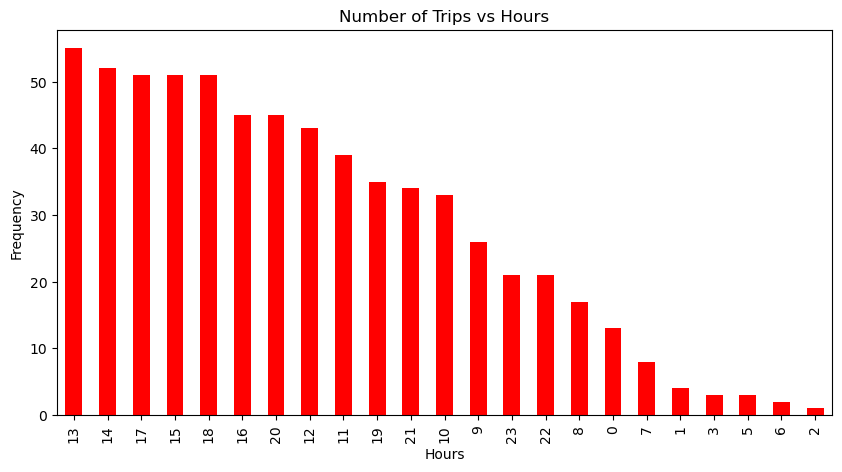

In [30]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = 'bar', color = 'red', figsize = (10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips vs Hours')

# Check Purpose of Trips

<Axes: xlabel='PURPOSE*'>

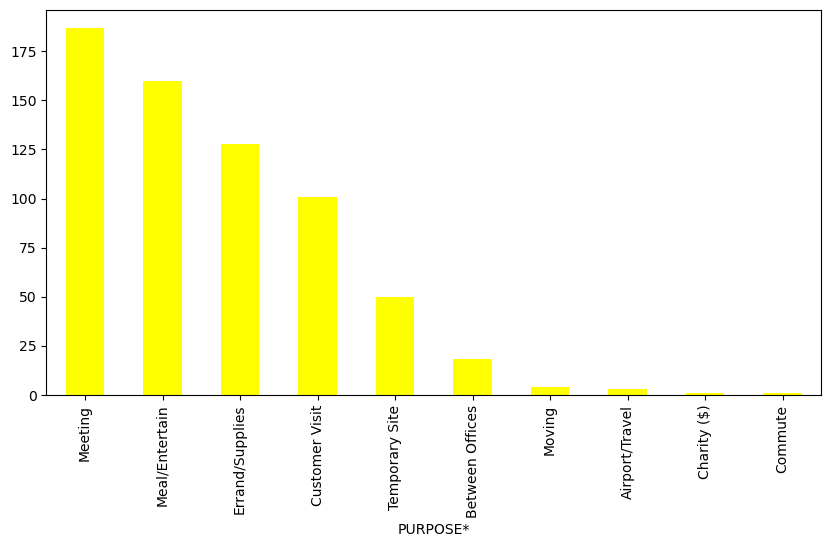

In [33]:
data['PURPOSE*'].value_counts().plot(kind = 'bar', figsize= (10,5), color ='yellow')

# Which day has Highest number of Trips?

<Axes: xlabel='WEEKDAY'>

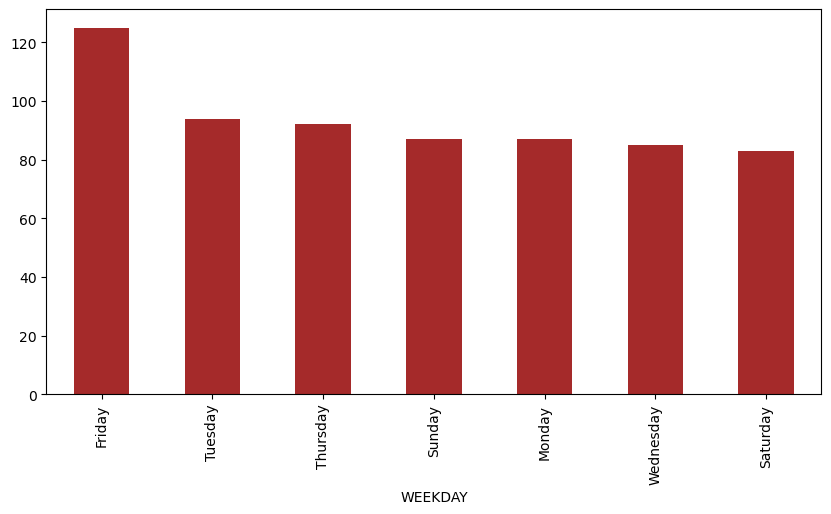

In [34]:
 data['WEEKDAY'].value_counts().plot(kind = 'bar', figsize= (10,5), color ='brown')

# What are number of Trips each day?

<Axes: xlabel='DAY'>

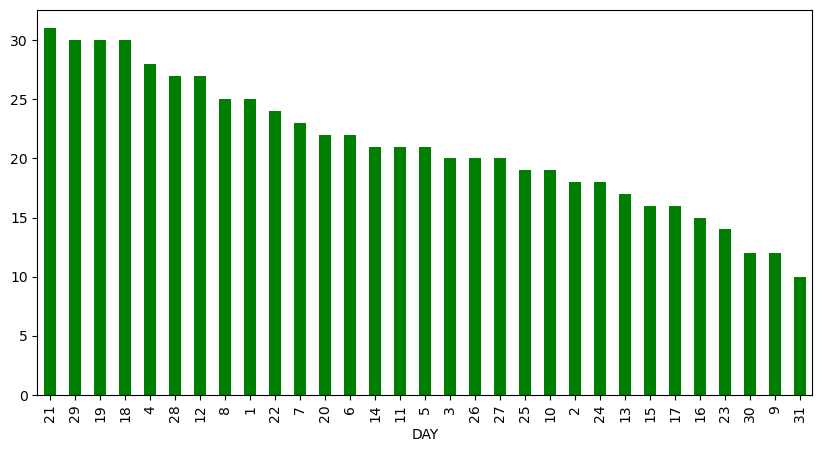

In [38]:
data['DAY'].value_counts().plot(kind ='bar', color = 'green', figsize = (10,5))

# What are the Trips in a Month ?

<Axes: xlabel='MONTH'>

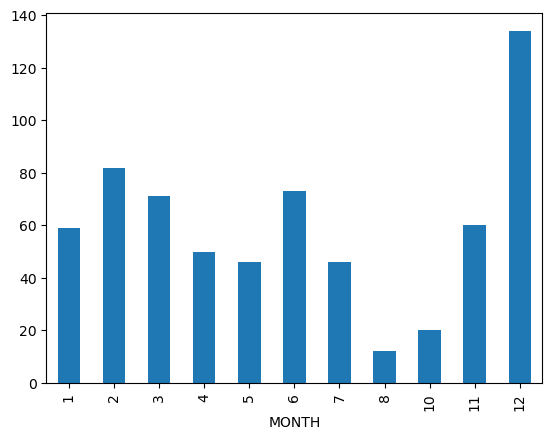

In [47]:
data['MONTH'].sort_values().value_counts(sort=False).plot(kind = 'bar')

# The Starting point of the trips. Where do people start boarding their trip from most?

<Axes: xlabel='START*'>

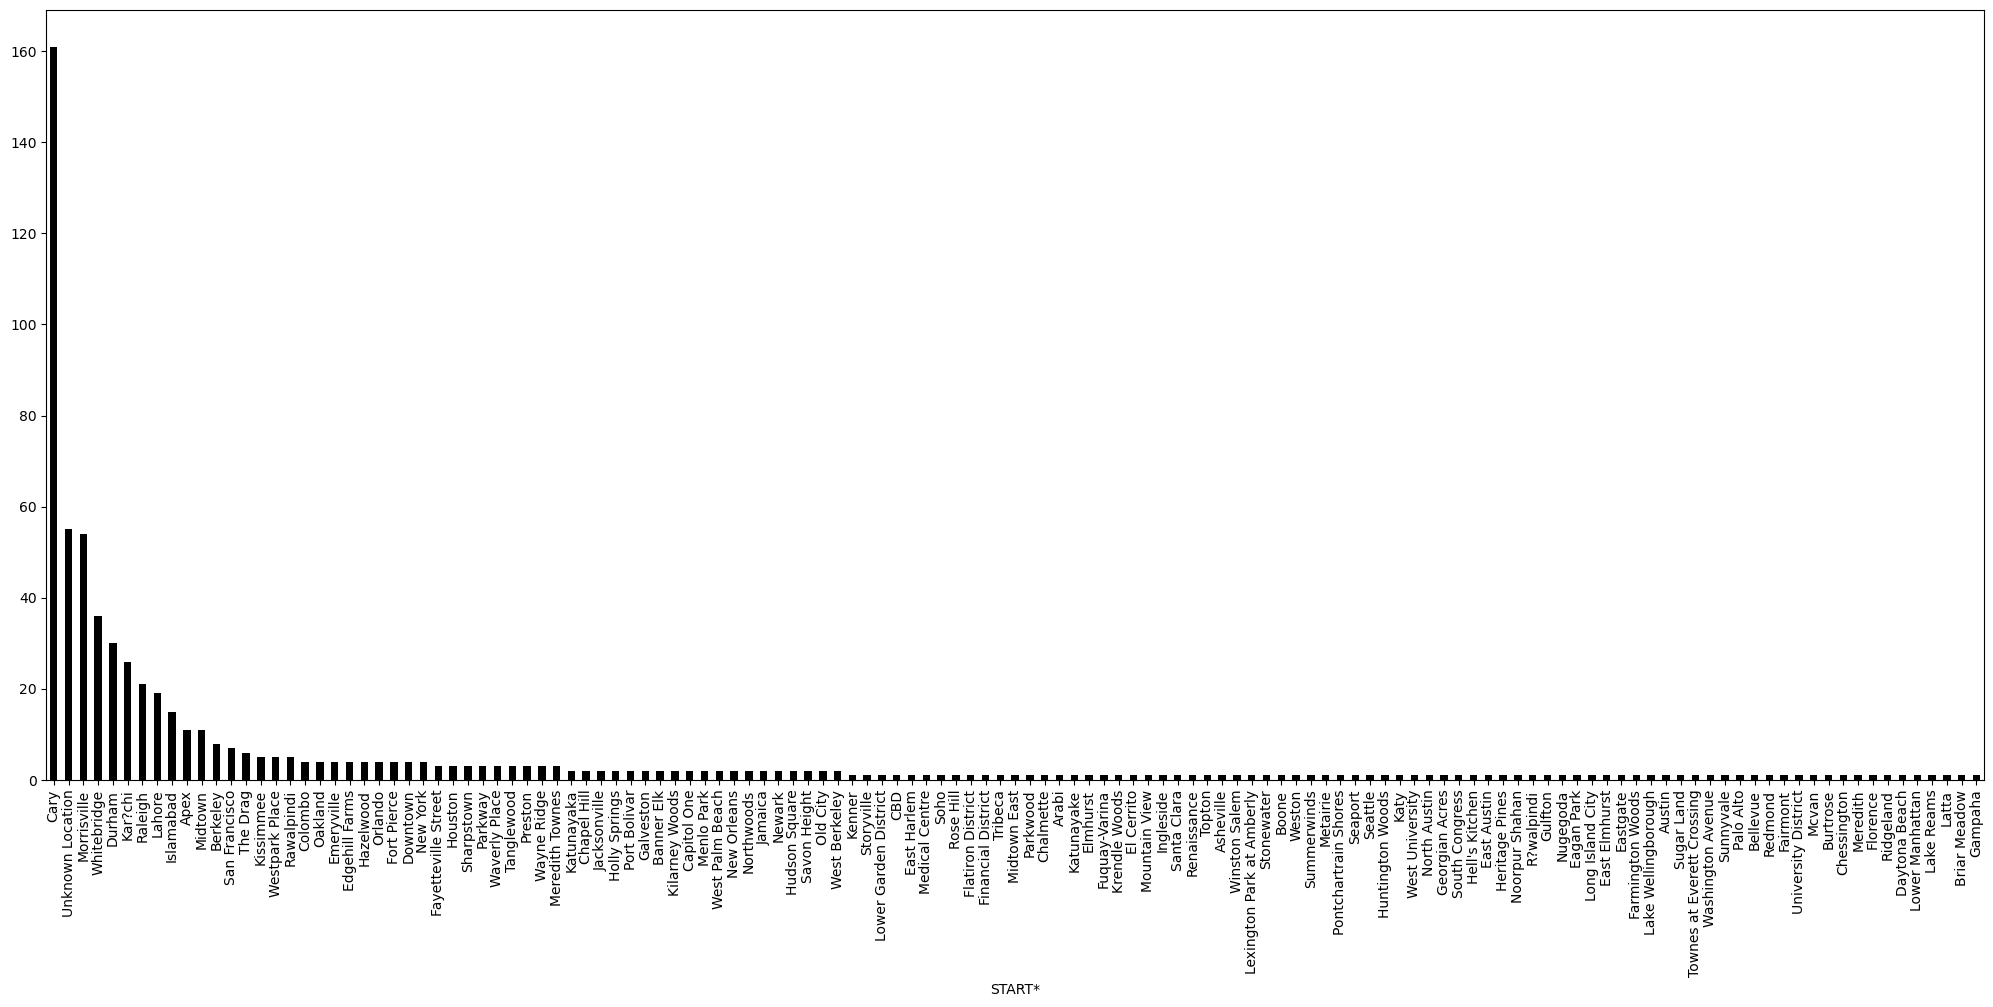

In [50]:
data['START*'].value_counts().plot(kind = 'bar', figsize = (25,10), color = 'black')